# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Muhammad Varel Arifianta]
- **Email:** [mhdvarels@gmail.com]
- **ID Dicoding:** [varelsaurus]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola penyewaan sepeda berdasarkan musim selama periode Januari 2011 hingga Desember 2012 dapat dimanfaatkan untuk meningkatkan strategi pemasaran dan penempatan sepeda di lokasi tertentu?
- Pertanyaan 2 : Bagaimana korelasi antara suhu dan jumlah penyewaan sepeda selama periode Januari 2011 hingga Desember 2012 dapat dimanfaatkan untuk mengoptimalkan jadwal perawatan atau pengisian stok sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [194]:
day_df = pd.read_csv("data/day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [195]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- Pada Dataset day.csv tidak terdapat kolom hr/jam jadi satuannya perhari, dan untuk jumlah penyewanya jadinya per 24 jam di jumlah
- Pada Dataset hour.csv terdapat kolom hr/jam yang menandakan satuannya perjam 

### Assessing Data

In [196]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [197]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [198]:
day_df.duplicated().sum()

np.int64(0)

In [199]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [200]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [201]:
hour_df.duplicated().sum()

np.int64(0)

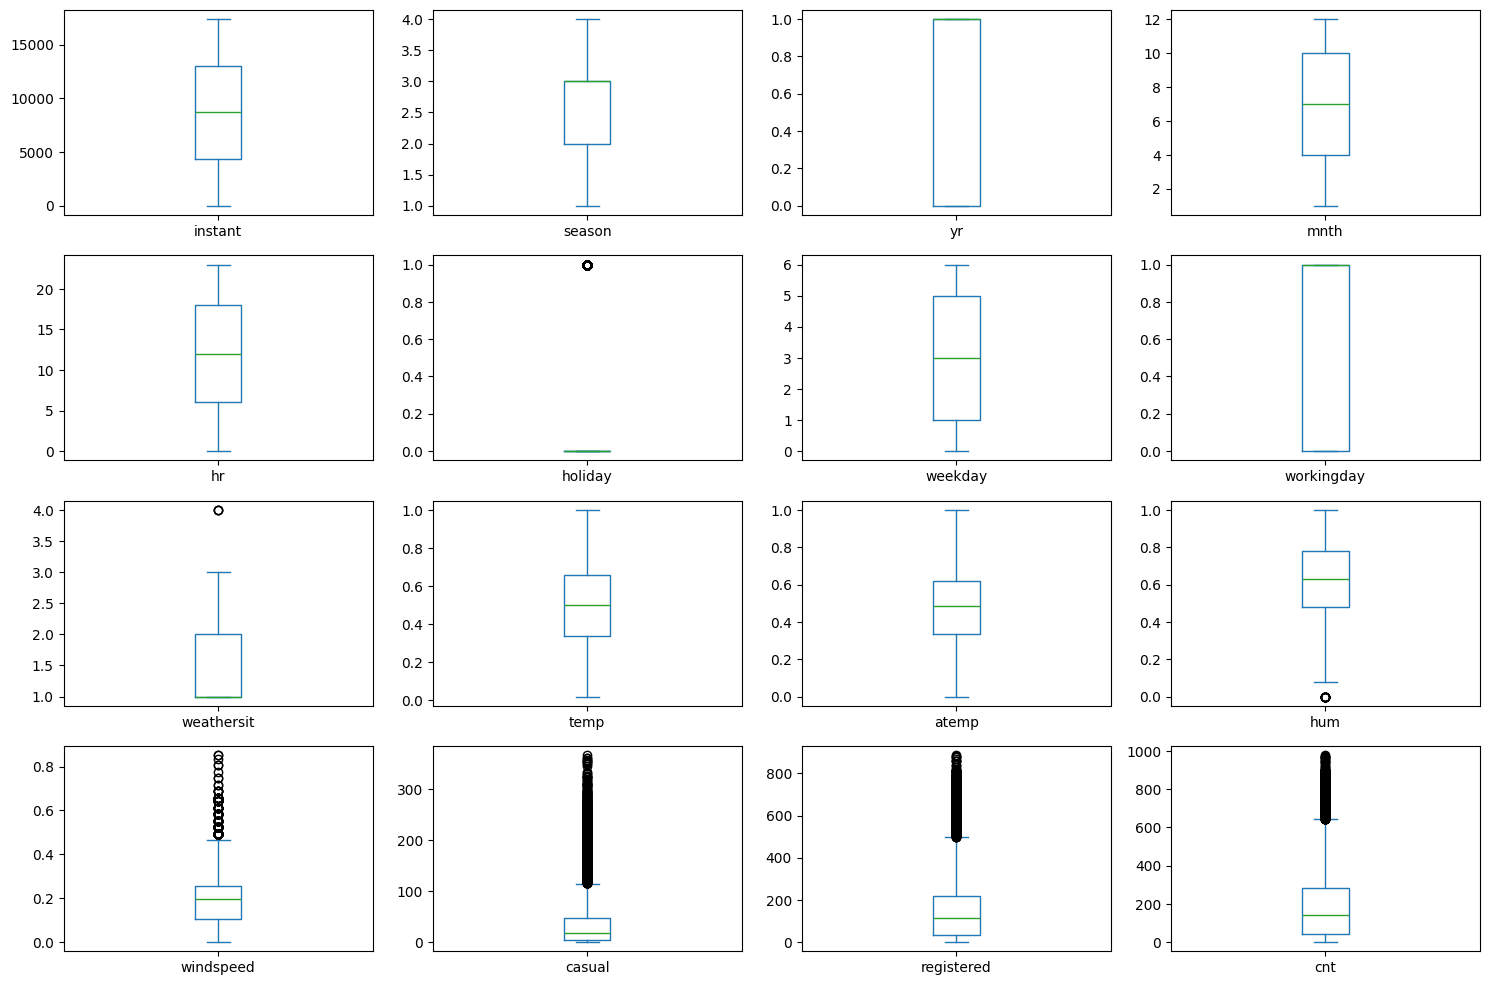

In [202]:
hour_df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.tight_layout()
plt.show()

In [203]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Temukan outliers
outliers = hour_df[(hour_df['cnt'] < Q1 - 1.5 * IQR) | (hour_df['cnt'] > Q3 + 1.5 * IQR)]

print(outliers)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
5536      5537  2011-08-23       3   0     8  14        0        2   
10358    10359  2012-03-12       1   1     3  17        0        1   
10359    10360  2012-03-12       1   1     3  18        0        1   
10382    10383  2012-03-13       1   1     3  17        0        2   
10383    10384  2012-03-13       1   1     3  18        0        2   
...        ...         ...     ...  ..   ...  ..      ...      ...   
16885    16886  2012-12-11       4   1    12   8        0        2   
16909    16910  2012-12-12       4   1    12   8        0        3   
16933    16934  2012-12-13       4   1    12   8        0        4   
17053    17054  2012-12-18       4   1    12   8        0        2   
17077    17078  2012-12-19       4   1    12   8        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
5536            1           1  0.72  0.6515  0.30     0.0896     149   
10358          

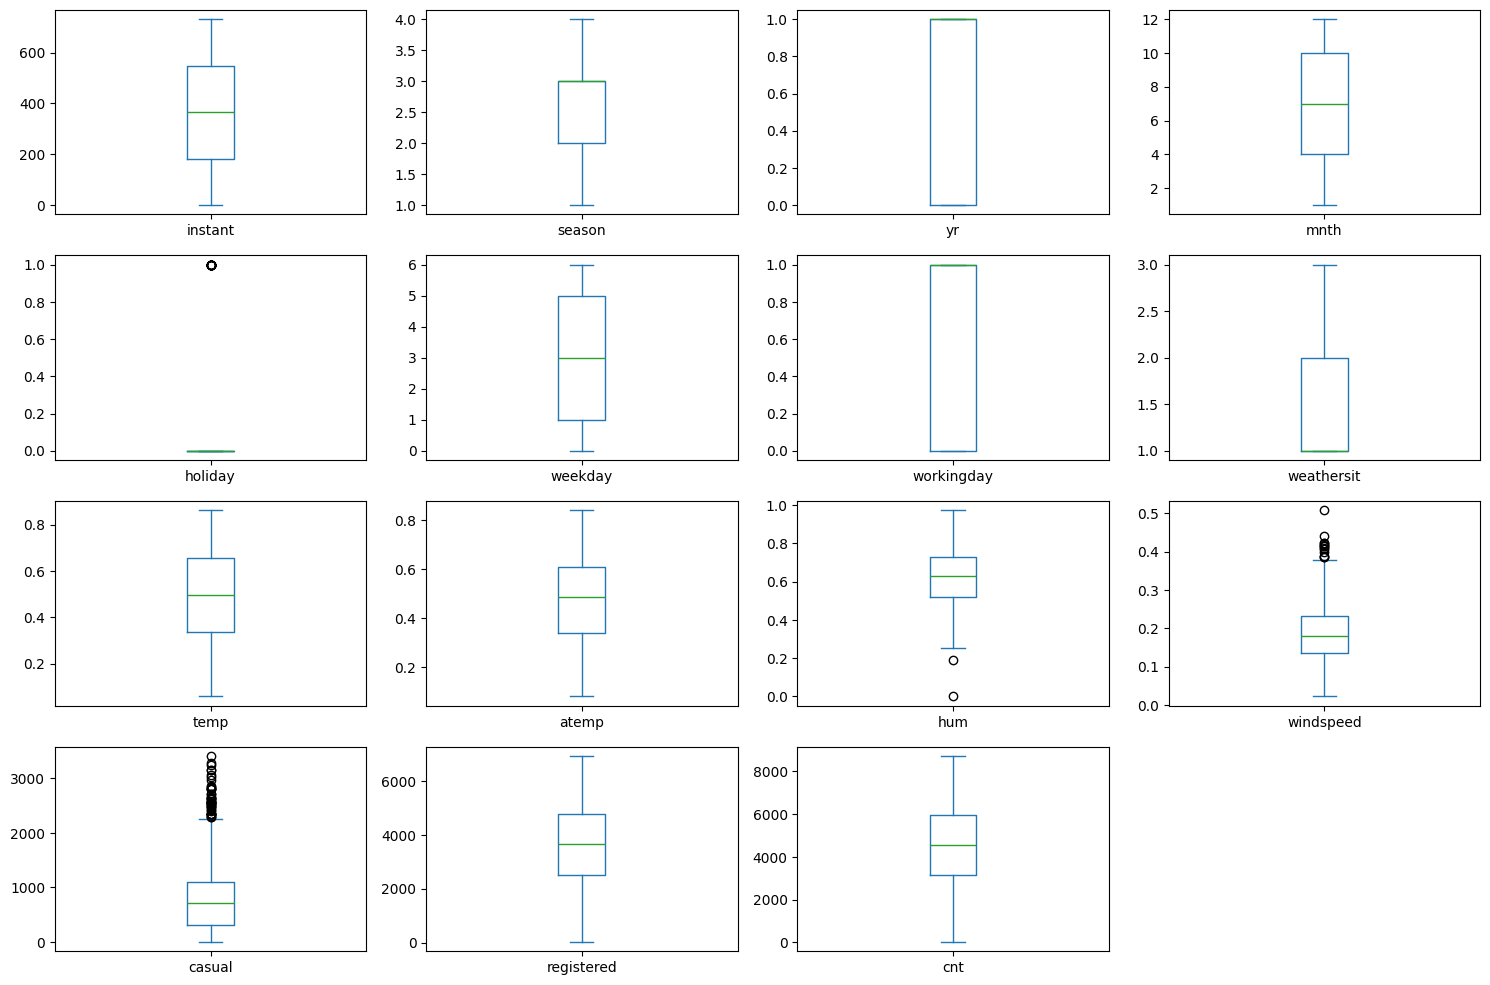

In [204]:
day_df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.tight_layout()
plt.show()

**Insight:**
- Pada df day & hour tidak terdapat data yang duplikat dan juga data yang kosong
- Pada df hour terdapat outliers pada banyak kolom termasuk cnt 

### Cleaning Data

In [205]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [206]:
print(day_df['dteday'].dtypes)

datetime64[ns]


In [207]:
print(hour_df['dteday'].dtypes)

datetime64[ns]


In [208]:
day_df['season_label'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

**Insight:**
- Mengubah tipe data yang dari awalnya object menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [209]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


In [210]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [211]:
day_df.dteday.min()

Timestamp('2011-01-01 00:00:00')

In [212]:
day_df.dteday.max()

Timestamp('2012-12-31 00:00:00')

In [213]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dteday        731 non-null    datetime64[ns]
 2   season        731 non-null    int64         
 3   yr            731 non-null    int64         
 4   mnth          731 non-null    int64         
 5   holiday       731 non-null    int64         
 6   weekday       731 non-null    int64         
 7   workingday    731 non-null    int64         
 8   weathersit    731 non-null    int64         
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  cnt           731 non-null    int64     

In [214]:
season_counts = day_df.groupby('season_label')['cnt'].sum()
print(season_counts)

season_label
Fall      1061129
Spring     471348
Summer     918589
Winter     841613
Name: cnt, dtype: int64


In [215]:
day_count = day_df.groupby('dteday')['cnt'].sum()
print(day_count)

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64


In [216]:
weather_counts = day_df.groupby('weathersit')['cnt'].sum().sort_values(ascending=False)
print(weather_counts)

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64


In [217]:
month_counts = day_df.groupby('mnth')['cnt'].sum()
print(month_counts)

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64


In [226]:
hours_counts = hour_df.groupby('hr')['cnt'].sum()
print(hours_counts)

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64


In [219]:
temp_counts = hour_df.groupby('temp')['cnt'].sum().sort_values(ascending=False)
print(temp_counts)

temp
0.70    177298
0.72    163449
0.74    161587
0.66    156204
0.64    154985
0.60    149905
0.62    148185
0.76    135660
0.56    123756
0.54    113962
0.80    112897
0.52    112850
0.50    105366
0.40    102809
0.36     99202
0.42     96087
0.46     91065
0.34     87274
0.32     82015
0.44     80566
0.30     74303
0.68     73129
0.82     72354
0.58     67730
0.38     61087
0.48     54845
0.78     52930
0.26     49170
0.84     44963
0.86     42307
0.24     41843
0.28     32132
0.22     29434
0.20     28230
0.90     27836
0.88     19274
0.92     15681
0.16     15083
0.18      9318
0.14      7605
0.12      4440
0.96      4392
0.94      3690
0.10      2514
0.02       712
0.06       672
0.04       570
0.98       539
0.08       480
1.00       294
Name: cnt, dtype: int64


In [220]:
working_counts = day_df.groupby('workingday')['cnt'].sum().sort_values(ascending=False)
print(working_counts)

workingday
1    2292410
0    1000269
Name: cnt, dtype: int64


In [227]:
year_count = day_df.groupby('yr')['cnt'].sum().sort_values(ascending=False)
print(year_count)

yr
1    2049576
0    1243103
Name: cnt, dtype: int64


In [221]:
day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                               
           nunique   max  min         mean          std
workingday                                             
0              231  8714  605  4330.168831  2052.141245
1              500  8362   22  4584.820000  1878.415583

**Insight:**
- Dari tahap EDA yang sudah saya lakukan saya dapat menemukan korelasi dari cuaca dan jumlah penyewa disaat Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog tidak ada penyewa sama sekali.
- Lalu pada masa working day peminjam cenderung lebih banyak dari pada saat weekend/liburan.

## Visualization & Explanatory Analysis

In [222]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Spring
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Spring


### Pertanyaan 1: Bagaimana pola penyewaan sepeda berdasarkan musim selama periode Januari 2011 hingga Desember 2012 dapat dimanfaatkan untuk meningkatkan strategi pemasaran?

C:\Users\Asus\AppData\Local\Temp\ipykernel_5496\2730286140.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_label', y='cnt', data=season_counts, palette='Blues_d', ax=ax1)


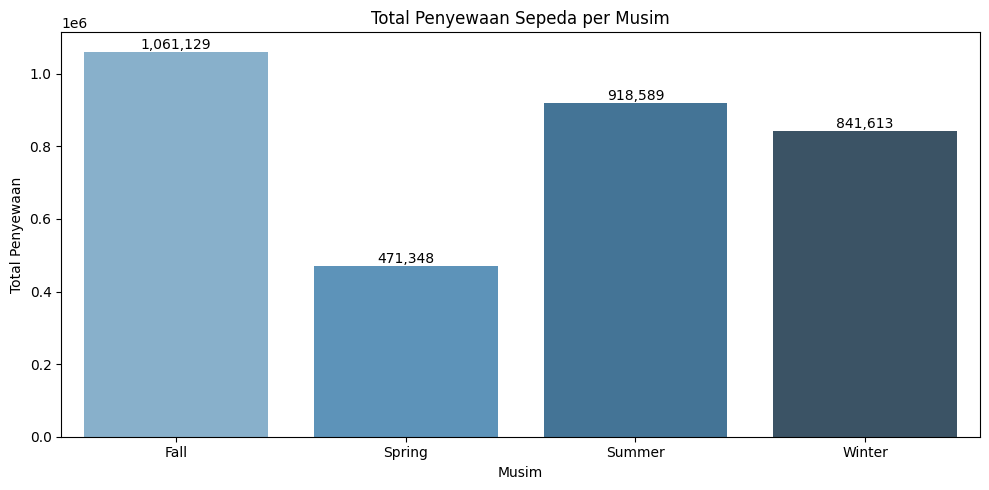

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt
season_counts = season_counts.reset_index()
season_counts.columns = ['season_label', 'cnt']
fig1, ax1 = plt.subplots(figsize=(10, 5))
sns.barplot(x='season_label', y='cnt', data=season_counts, palette='Blues_d', ax=ax1)

# Label & judul
ax1.set_xlabel('Musim')
ax1.set_ylabel('Total Penyewaan')
ax1.set_title('Total Penyewaan Sepeda per Musim')

# Tambah angka di atas batang
for i, v in enumerate(season_counts['cnt']):
    ax1.text(i, v + 100, f'{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_5496\2205588118.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df_2011['month'] = day_df_2011['dteday'].dt.month


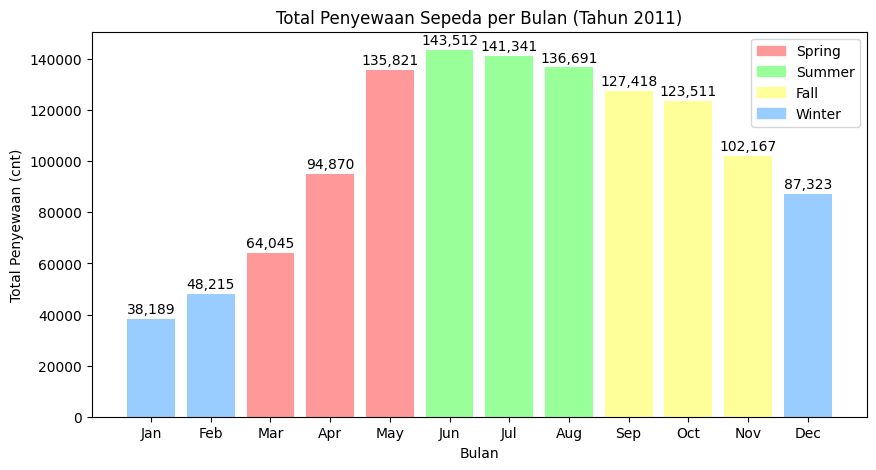

In [229]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data dari file day.csv
day_df = pd.read_csv('data/day.csv')
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Filter data untuk tahun 2011 (encode sebagai 0)
day_df_2011 = day_df[day_df['dteday'].dt.year == 2011]

# Ekstrak bulan dari data 2011
day_df_2011['month'] = day_df_2011['dteday'].dt.month

# Kelompokkan berdasarkan bulan dan hitung total penyewaan
month_counts = day_df_2011.groupby('month')['cnt'].sum()

# Mapping bulan ke musim dan warna (sesuai dataset Bike Sharing)
season_colors = {
    1: '#FF9999',  # Spring (Mar-Mei: 3-5)
    2: '#99FF99',  # Summer (Jun-Agu: 6-8)
    3: '#FFFF99',  # Fall (Sep-Nov: 9-11)
    4: '#99CCFF'   # Winter (Des-Feb: 12, 1-2)
}
month_colors = {month: season_colors[1] if month in [3, 4, 5] else
                season_colors[2] if month in [6, 7, 8] else
                season_colors[3] if month in [9, 10, 11] else
                season_colors[4] for month in range(1, 13)}

# Buat plot
plt.figure(figsize=(10, 5))
bars = plt.bar(month_counts.index, month_counts.values, color=[month_colors[month] for month in month_counts.index])

# Tambahkan nilai di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1000, f'{int(height):,}', ha='center', va='bottom')

# Label dan judul
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan (cnt)')
plt.title('Total Penyewaan Sepeda per Bulan (Tahun 2011)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

# Tambahkan legenda
plt.legend(handles=[
    plt.Rectangle((0,0),1,1, color=season_colors[1], label='Spring'),
    plt.Rectangle((0,0),1,1, color=season_colors[2], label='Summer'),
    plt.Rectangle((0,0),1,1, color=season_colors[3], label='Fall'),
    plt.Rectangle((0,0),1,1, color=season_colors[4], label='Winter')
], loc='upper right')

# Tampilkan plot
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_5496\53592635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df_2012['month'] = day_df_2012['dteday'].dt.month


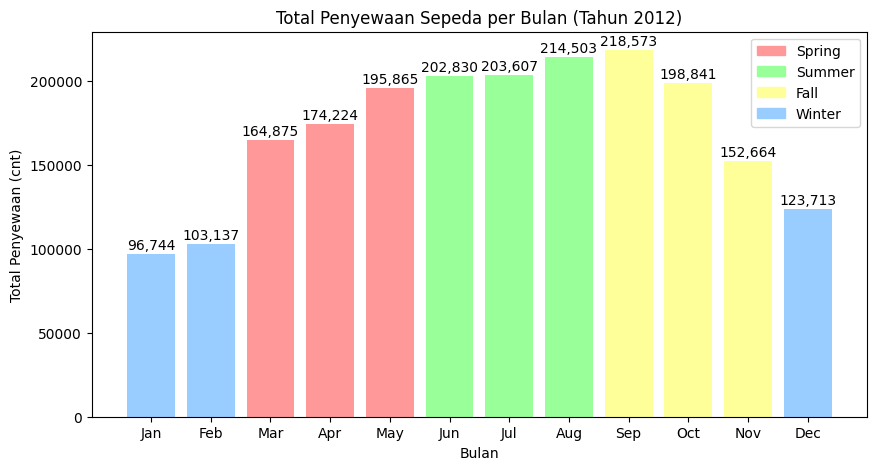

In [234]:
day_df_2012 = day_df[day_df['dteday'].dt.year == 2012]
day_df_2012['month'] = day_df_2012['dteday'].dt.month
month_counts = day_df_2012.groupby('month')['cnt'].sum()

season_colors = {
    1: '#FF9999',  
    2: '#99FF99',  
    3: '#FFFF99', 
    4: '#99CCFF'   
}
month_colors = {month: season_colors[1] if month in [3, 4, 5] else
                season_colors[2] if month in [6, 7, 8] else
                season_colors[3] if month in [9, 10, 11] else
                season_colors[4] for month in range(1, 13)}

plt.figure(figsize=(10, 5))
bars = plt.bar(month_counts.index, month_counts.values, color=[month_colors[month] for month in month_counts.index])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1000, f'{int(height):,}', ha='center', va='bottom')

plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan (cnt)')
plt.title('Total Penyewaan Sepeda per Bulan (Tahun 2012)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

plt.legend(handles=[
    plt.Rectangle((0,0),1,1, color=season_colors[1], label='Spring'),
    plt.Rectangle((0,0),1,1, color=season_colors[2], label='Summer'),
    plt.Rectangle((0,0),1,1, color=season_colors[3], label='Fall'),
    plt.Rectangle((0,0),1,1, color=season_colors[4], label='Winter')
], loc='upper right')
plt.show()

### Pertanyaan 2: Bagaimana korelasi antara suhu dan jumlah penyewaan sepeda selama periode Januari 2011 hingga Desember 2012 dapat dimanfaatkan untuk mengoptimalkan jadwal perawatan?


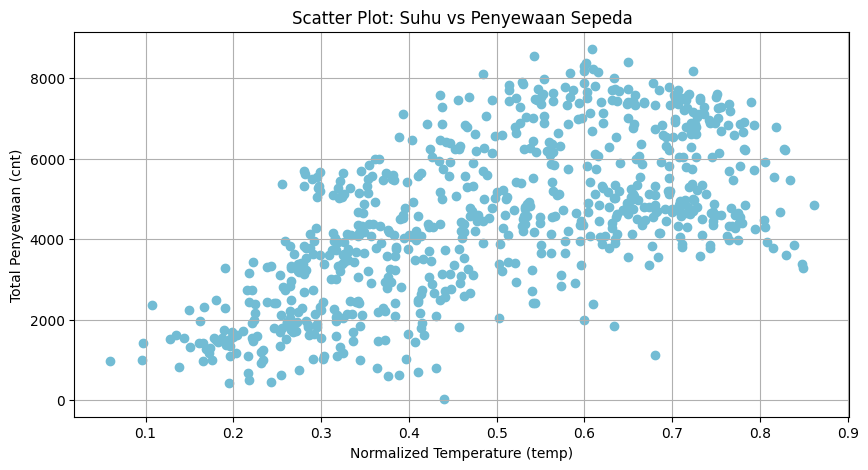

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(day_df['temp'], day_df['cnt'], color='#72BCD4')
plt.xlabel('Normalized Temperature (temp)')
plt.ylabel('Total Penyewaan (cnt)')
plt.title('Scatter Plot: Suhu vs Penyewaan Sepeda')
plt.grid(True)
plt.show()

**Insight:**
- Data menunjukkan tren penyewaan sepeda meningkat signifikan pada musim panas dan musim gugur, dengan puncak tertingginya Juni - September.
- Dari analisis, terdapat korelasi positif sedang-kuat antara suhu dan jumlah penyewaan, dari hasil visualisasi scatter plot, menunjukkan bahwa penyewaan meningkat di rentang suhu 0.5 - 0.8. 
- Suhu ekstrem dapat menurunkan minat pengguna untuk menyewa sepeda yang dapat dibuktikan pada menurunnya pengguna pada suhu kecil.

## Conclusion

- Conclution pertanyaan 1 : Pemasaran bisa difokuskan pada musim panas dan gugur karena potensi peningkatan penyewaan tertinggi, dan juga pada musim dingin dan musim semi. Perusahaan dapat mengurangi jumlah unit untuk efisiensi biaya.
- Conclution pertanyaan 2 : Informasi korelasi suhu dan penyewaan sepeda dapat digunakan untuk membuat jadwal perawatan di musim dingin dan semi ketika permintaan lebih rendah, sehingga tidak mengganggu operasional di puncak musim. 